# Prédiction de churn: secteur des télécoms

In [3]:
# Importation des librairies
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

## 1. Chargement des données

In [4]:
# Chargement des données
data = pd.read_csv("../Data/telco.csv")
data.shape

(1000, 23)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
Region               1000 non-null object
NbMoisService        1000 non-null int64
Age                  1000 non-null int64
StatutMarital        1000 non-null object
Adresse              1000 non-null int64
Revenu               1000 non-null int64
education            1000 non-null object
NbAnneesEmployeur    1000 non-null int64
Retraite             1000 non-null object
Sexe                 1000 non-null object
TailleFoyer          1000 non-null int64
ServiceNumVert       1000 non-null object
LocMateriel          1000 non-null object
ServiceCarteAppel    1000 non-null object
ServiceSansFil       1000 non-null object
Internet             1000 non-null object
AffichageNumAppel    1000 non-null object
DoubleAppel          1000 non-null object
TransfertAppel       1000 non-null object
ConfTel              1000 non-null object
PaieElectronique     1000 non-null object
CatClient         

Nous avons un dataset composé de **1 000** observations et de **23** variables.
La variable d'intérêt que nous souhaitons prédire est la variable *Churn*.
Nous sommes donc dans un problème de **classification**.

Nous disposons de 23 variables:
- 1 variable d'intéret que nous souhaitons prédire: Churn
- 5 variables catégorielles: région, statut marital, éducation, sexe, catégorie client
- 11 variables indicatrices (Oui/Non) : location matériel, Internet, double appel, ...
- 6 variables numériques: nombre de mois d'ancienneté, âge, revenu, ...

In [5]:
data.describe()

,NbMoisService,Age,Adresse,Revenu,NbAnneesEmployeur,TailleFoyer
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.526000,41.684000,11.551000,77.535000,10.987000,2.331000
std,21.359812,12.558816,10.086681,107.044165,10.082087,1.435793
min,1.000000,18.000000,0.000000,9.000000,0.000000,1.000000
25%,17.000000,32.000000,3.000000,29.000000,3.000000,1.000000
50%,34.000000,40.000000,9.000000,47.000000,8.000000,2.000000
75%,54.000000,51.000000,18.000000,83.000000,17.000000,3.000000
max,72.000000,77.000000,55.000000,1668.000000,47.000000,8.000000


In [6]:
data.columns

Index(['Region', 'NbMoisService', 'Age', 'StatutMarital', 'Adresse', 'Revenu',
       'education', 'NbAnneesEmployeur', 'Retraite', 'Sexe', 'TailleFoyer',
       'ServiceNumVert', 'LocMateriel', 'ServiceCarteAppel', 'ServiceSansFil',
       'Internet', 'AffichageNumAppel', 'DoubleAppel', 'TransfertAppel',
       'ConfTel', 'PaieElectronique', 'CatClient', 'Churn'],
      dtype='object')

In [7]:
data.head()

,Region,NbMoisService,Age,StatutMarital,Adresse,Revenu,education,NbAnneesEmployeur,Retraite,Sexe,...,ServiceCarteAppel,ServiceSansFil,Internet,AffichageNumAppel,DoubleAppel,TransfertAppel,ConfTel,PaieElectronique,CatClient,Churn
0,Zone 2,13,44,Marie(e),9,64,Bac +2/3,5,Non,Homme,...,Oui,Non,Aucun,Non,Non,Oui,Non,Non,Service basic,Oui
1,Zone 3,11,33,Marie(e),7,136,Bac +4/5,5,Non,Homme,...,Oui,Oui,Aucun,Oui,Oui,Oui,Oui,Non,Service Total,Oui
2,Zone 3,68,52,Marie(e),24,116,Inf au bac,29,Non,Femme,...,Oui,Non,Aucun,Oui,Oui,Non,Oui,Non,Service plus,Non
3,Zone 2,33,33,Non marie(e),12,33,Niveau Bac,0,Non,Femme,...,Non,Non,Aucun,Non,Non,Non,Non,Non,Service basic,Oui
4,Zone 2,23,30,Marie(e),9,30,Inf au bac,2,Non,Homme,...,Non,Non,Aucun,Oui,Non,Oui,Oui,Non,Service plus,Non


In [8]:
data.dtypes

Region               object
NbMoisService         int64
Age                   int64
StatutMarital        object
Adresse               int64
Revenu                int64
education            object
NbAnneesEmployeur     int64
Retraite             object
Sexe                 object
TailleFoyer           int64
ServiceNumVert       object
LocMateriel          object
ServiceCarteAppel    object
ServiceSansFil       object
Internet             object
AffichageNumAppel    object
DoubleAppel          object
TransfertAppel       object
ConfTel              object
PaieElectronique     object
CatClient            object
Churn                object
dtype: object

In [103]:
data.isna().sum().sum()
# check des NA ==> OK

0

In [9]:
X = data.drop(columns=["Churn"])
y = data["Churn"]

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import scale

column_transformer = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 3, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])],# the column numbers I want to apply this to
    remainder='passthrough'# permet de ne pas toucher aux autres colonnes
)

X_prepared = column_transformer.fit_transform(X) 
print(X_prepared)
print(X_prepared.shape)

label_transformer = LabelBinarizer()

y_prepared = label_transformer.fit_transform(y)
print(y_prepared)
print(y_prepared.shape)

X_prepared_scaled = scale(X_prepared, axis=0, with_mean=True, with_std=True)


[[  0.   1.   0. ...  64.   5.   2.]
 [  0.   0.   1. ... 136.   5.   6.]
 [  0.   0.   1. ... 116.  29.   2.]
 ...
 [  0.   0.   1. ... 944.  33.   1.]
 [  0.   0.   1. ...  87.  22.   1.]
 [  0.   0.   1. ...  39.   3.   3.]]
(1000, 44)
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 

## 2. Split échantillon d'apprentissage et de test

In [209]:
from sklearn.model_selection import train_test_split

X_training, X_testing, y_training, y_testing = train_test_split(X_prepared_scaled, y_prepared, test_size=0.25, random_state=333)

print(X_training.shape)
print(X_testing.shape)
print(y_training.shape)
print(y_testing.shape)

(750, 44)
(250, 44)
(750, 1)
(250, 1)


Notre échantillon d'apprentissage est constitué de 700 observations tandis que notre échantillon de test en comporte 300.

In [210]:
print(type(X_training))

<class 'numpy.ndarray'>


In [211]:
prop_training = np.unique(y_training, return_counts=True)[1][1]/y_training.shape[0]
prop_testing = np.unique(y_testing, return_counts=True)[1][1]/y_testing.shape[0]

print(prop_training)
print(prop_testing)

0.2653333333333333
0.3


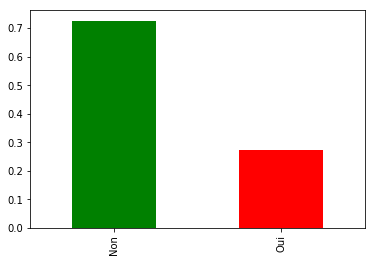

In [212]:
data["Churn"].value_counts(normalize=True).plot(kind='bar', color = colors)
plt.show()

Le taux d'attrition sur les échantillons d'apprentissage et de test semblent consistents.

## 3. Statistiques Descriptives

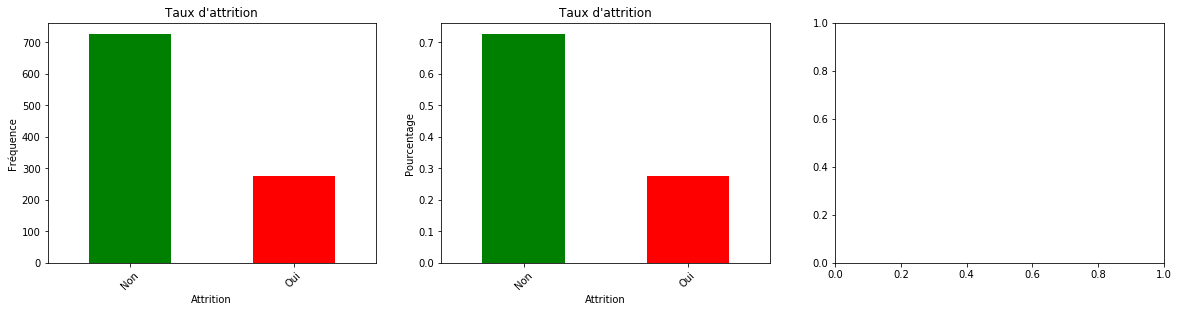

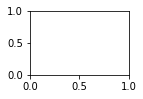

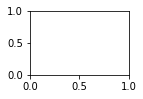

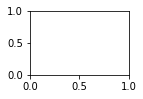

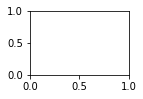

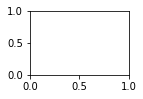

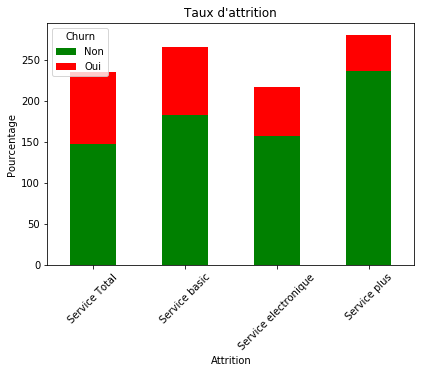

In [213]:
legend = ["Churn", "No churn"]
colors = ["green", "red"]


plt.figure(figsize=(20,15))


# variable churn ==> fréquence absolue
plt.subplot(331)

data["Churn"].value_counts().plot(kind='bar', color=colors, rot=45)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Fréquence")

# variable churn ==> fréquence pourcentage
plt.subplot(332)

data["Churn"].value_counts(normalize=True).plot(kind='bar', color=colors, rot=45)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Pourcentage")



# variable région
plt.subplot(333)

data.groupby(["Region", "Churn"]).size().unstack().plot(kind='bar', rot=45, color=colors)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Pourcentage")




# variable statut marital
plt.subplot(334)

pd.crosstab(data.StatutMarital, data.Churn).plot(kind='bar', rot=45, color=colors)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Pourcentage")


# variable retraite/actif
plt.subplot(335)

pd.crosstab(data.Retraite, data.Churn).plot(kind='bar', rot=45, color=colors)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Pourcentage")



# variable sexe
plt.subplot(336)

pd.crosstab(data.Sexe, data.Churn).plot(kind='bar', rot=45, color=colors)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Pourcentage")



# variable mode d'acquisition du matériel
plt.subplot(337)

pd.crosstab(data.LocMateriel, data.Churn).plot(kind='bar', rot=45, color=colors)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Pourcentage")



# variable catégorie de clients
plt.subplot(338)

pd.crosstab(data.CatClient, data.Churn).plot(kind='bar', rot=45, color=colors, stacked=True)
plt.title("Taux d'attrition")
plt.xlabel("Attrition")
plt.ylabel("Pourcentage")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.05,
                    wspace=0.05)


plt.show()

In [214]:
data.groupby(["Churn", "Region"]).size()

Churn  Region
Non    Zone 1    232
       Zone 2    240
       Zone 3    254
Oui    Zone 1     90
       Zone 2     94
       Zone 3     90
dtype: int64

In [215]:
data[["Churn", "Region"]]

,Churn,Region
0,Oui,Zone 2
1,Oui,Zone 3
2,Non,Zone 3
3,Oui,Zone 2
4,Non,Zone 2
5,Non,Zone 2
6,Oui,Zone 3
7,Non,Zone 2
8,Non,Zone 3
9,Non,Zone 1


Près de 28% des clients ont résilé leur contrat dans la base d'apprentissage.
On peut identifier les variables impactant le risque d'attrition en:
- implémentant un test du CHI deux afin de tester l'hypothèse nulle d'indépendance entre une variable catégorielle et le churn
- analysant la répartition du churn selon les variables à l'aide de diagrammes en barres par exemple


La région du client ne semble pas impacter l'attrition.
Le statut marital ne semble pas influer sur le risque d'attrition
Un client retraité ne semble pas être exposé à un risque d'attrition contrairement aux clients actifs

Il semble y avoir un risque plus élevé d'attrition chez les hommes mais peu significatif.

Le mode de paiement électronique est associé à un fort risque d'attrition. Ceci peut être expliqué par le fait que ces clients utilisent souvent internet les applications mobiles et vont davanatge comparer les offres d'abonnement téléphonique entre les différents opérateurs. Ils ont ainsi tendance à partir à la concurrence.

Les clients qui louent leur matériel sont soumis à un risque d'attrition supérieur à ceux qui ne louent pas. 

La catégorie de clients la moins impacté par l'attrition est Service Plus.

## 4. Machine Learning

### a) Régression Logistique

In [216]:
from sklearn.linear_model import LogisticRegression

model_glm = LogisticRegression(solver="liblinear")

model_glm.fit(X_training, y_training.ravel())

print(y_training.ravel().shape)

(750,)


In [217]:
predictions_glm = model_glm.predict_proba(X_testing)[:,1]

In [218]:
predictions_glm.shape

(250,)

### b) Forêts Aléatoires

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import time

customized_scorer = make_scorer(roc_auc_score)

params  = {"criterion":["gini", "entropy"],
           "max_depth": np.arange(1, 20),
           "max_features": np.arange(1, 20),
           "class_weight": [None, "balanced"]
          }

model_rf = GridSearchCV(estimator = RandomForestClassifier(random_state = 123, 
                                                              n_estimators = 150), 
                           param_grid = params, 
                           cv = 5, 
                           scoring = customized_scorer,
                           iid=True,
                           n_jobs = 4)

tic = time.time()

model_rf.fit(X_training, y_training.ravel())

tac = time.time()

print("The model has taken " + str(round(tac-tic, 1)) + " seconds to run through cross-validation")

model_rf.best_params_

In [ ]:
predictions_rf = model_rf.predict_proba(X_testing)[:,1]

In [ ]:
predictions_rf.shape

In [ ]:
[np.arange(20, 50, 5)]

### c) AdaBoost

In [ ]:
# hyper parameters learning through k-fold cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

params  = {"n_estimators": np.arange(20, 50, 5),
           "learning_rate": np.arange(0.01, 0.1, 0.01)
          }


model_boost = GridSearchCV(estimator = AdaBoostClassifier(random_state = 123), 
                           param_grid = params, 
                           cv = 5, 
                           scoring = 'accuracy', 
                           n_jobs = 4)

tic = time.time()

model_boost.fit(X_training, y_training.ravel())

tac = time.time()

print("The model has taken " + str(round(tac-tic, 1)) + " seconds to run through cross-validation")

model_boost.best_params_

In [ ]:
predictions_boost = model_boost.predict_proba(X_testing)[:,1]

In [ ]:
predictions_boost.shape

## 5) Benchmark de la performance prédictive

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
                  
    
auc_models = [roc_auc_score(y_testing, predictions_glm),
              roc_auc_score(y_testing, predictions_rf),
              roc_auc_score(y_testing, predictions_boost)]
                            
models = ["Logistic Regression", "Random Forest", "AdaBoost"]

In [ ]:
plt.figure(figsize=(18,9))

### Courbe ROC
plt.subplot(121)
fpr, tpr, _ = roc_curve(y_testing, predictions_glm)
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_testing, predictions_rf)
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_testing, predictions_boost)
plt.plot(fpr, tpr)

plt.legend(models)
plt.plot([0, 1], color = "grey", linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve across models")

### AUC
plt.subplot(122)
plt.bar(range(3), auc_models, color = ["blue", "green", "orange"])
plt.xticks(range(3), models)
plt.ylim([0.7, 0.9])
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("Areas Under the Curve across models")

plt.show()

In [ ]:
print(auc_models)